In [182]:
import csv
import psycopg2
import requests

In [183]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [184]:
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

db[:5]

[['session', 'year', 'country', 'text'],
 ['44',
  '1989',
  'MDV',
  "ï»¿It is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further consolidate the gains achieved during the past year.\nMy delegation associates itself with previous speakers in expressing its appreciation of the dedicated efforts of his predecessor, His Excellency Mr. Dante Caputo, for the exemplary manner in which he discharged his duties as President of the forty-third session of the General Assembly.\nAs in previous years, my delegation wishes to note its satisfaction with and gratitude for the assiduous and unrelenting efforts exerted by the Secretary-General of the United Nations i

In [185]:
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
cur = conn.cursor()
cur.execute("select name from country")
res = cur.fetchall()
matrix1 = {}
matrix2 = {}
for row in res:
    matrix1[row[0]] = 0
matrix1['Czechoslovakia'] = 0
matrix1['East Germany'] = 0
matrix1['European Union'] = 0
matrix1['Montenegro'] = 0
matrix1['Romania'] = 0
matrix1['South Sudan'] = 0
matrix1['East Timor'] = 0
matrix1['Democratic Yemen'] = 0
for row in res:
    copiedmatrix = matrix1.copy()
    matrix2[row[0]] = copiedmatrix
matrix2['Czechoslovakia'] = copiedmatrix
matrix2['East Germany'] = copiedmatrix
matrix2['European Union'] = copiedmatrix
matrix2['Montenegro'] = copiedmatrix
matrix2['Romania'] = copiedmatrix
matrix2['South Sudan'] = copiedmatrix
matrix2['East Timor'] = copiedmatrix
matrix2['Democratic Yemen'] = copiedmatrix

In [186]:
g = nx.Graph()
g.add_nodes_from(matrix2)

In [187]:
res = requests.get('https://opendata.socrata.com/api/views/mnkm-8ram/rows.json?accessType=DOWNLOAD')

j = res.json()

latlong = {}

for i in j['data']:
    lat = i[12]
    long = i[13]
    latlong[i[10]] = (lat, long)

for country in latlong:
    print(country + ': Latitude = ' + latlong[country][0] + ' Longitude = ' + latlong[country][1])

PER: Latitude = -10 Longitude = -76
MOZ: Latitude = -18.25 Longitude = 35
MMR: Latitude = 22 Longitude = 98
TKL: Latitude = -9 Longitude = -172
VGB: Latitude = 18.5 Longitude = -64.5
SYC: Latitude = -4.5833 Longitude = 55.6667
KIR: Latitude = 1.4167 Longitude = 173
MHL: Latitude = 9 Longitude = 168
SHN: Latitude = -15.9333 Longitude = -5.7
MKD: Latitude = 41.8333 Longitude = 22
BVT: Latitude = -54.4333 Longitude = 3.4
SRB: Latitude = 44 Longitude = 21
HKG: Latitude = 22.25 Longitude = 114.1667
MAC: Latitude = 22.1667 Longitude = 113.55
ESP: Latitude = 40 Longitude = -4
PYF: Latitude = -15 Longitude = -140
SLV: Latitude = 13.8333 Longitude = -88.9167
HUN: Latitude = 47 Longitude = 20
CHE: Latitude = 47 Longitude = 8
FRO: Latitude = 62 Longitude = -7
TCA: Latitude = 21.75 Longitude = -71.5833
NAM: Latitude = -22 Longitude = 17
LSO: Latitude = -29.5 Longitude = 28.5
AND: Latitude = 42.5 Longitude = 1.6
NIC: Latitude = 13 Longitude = -85
NOR: Latitude = 62 Longitude = 10
MLT: Latitude = 35

In [188]:
# first just create an in-memory list that contains all of the csv data
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

In [189]:
unknown_country = []  
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'] , 
    'DDR': ['East Germany', 'Europe', 'Western Europe'],
    'EU': ['European Union', 'Europe','Western Europe'],
    'MNE': ['Montenegro', 'Europe', 'Eastern Europe'], 
    'ROU': ['Romania', 'Europe','Eastern Europe'], 
    'SSD': ['South Sudan', 'Africa', 'Northern Africa'], 
    'TLS': ['East Timor','Asia','Southeast Asia'], 
    'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:   # skip the first row
    cur.execute("""select code, name, region, continent 
                   from country where code = %s""", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
        if row[2] in latlong:
            row.append(latlong[row[2]][0])
            row.append(latlong[row[2]][1])
        else:
            row.append('Unknown Latitude')
            row.append('Unknown Longitude')
    else:
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])  # name
        row.append(other_countries[row[2]][2])  # region
        row.append(other_countries[row[2]][1])  # continent
        if row[2] in latlong:
            row.append(latlong[row[2]][0])
            row.append(latlong[row[2]][1])
        else:
            row.append('Unknown Latitude')
            row.append('Unknown Longitude')
        
                
    quote = row[3]
    talkingcountry = row[4]
    for i in matrix2:
        matrix2[talkingcountry][i] += quote.count(i)
        if quote.count(i) > 20:
            g.add_edge(talkingcountry, i)


for i in matrix2:
    print(i + ' mentions...')
    for nation in matrix2[i]:
        print(nation + ' ' + str(matrix2[i][nation]) + ' times')
    print()
    print()

Democratic Yemen mentions...
Democratic Yemen 43 times
Gambia 0 times
Brazil 11 times
Afghanistan 94 times
France 17 times
Egypt 28 times
Portugal 21 times
Paraguay 0 times
Russian Federation 4 times
Saudi Arabia 2 times
Nicaragua 38 times
Cape Verde 4 times
Belgium 6 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 9 times
Seychelles 5 times
Syria 99 times
Thailand 5 times
Brunei 4 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 12 times
Bermuda 0 times
Lithuania 2 times
Ukraine 25 times
Fiji Islands 0 times
Puerto Rico 12 times
Haiti 6 times
Colombia 4 times
Belize 3 times
Mauritius 0 times
Poland 11 times
Barbados 0 times
Monaco 0 times
Nauru 1 times
Algeria 14 times
Comoros 1 times
Togo 0 times
Malaysia 8 times
European Union 78 times
Palau 0 times
Gibraltar 0 times
Tunisia 6 times
Tanzania 6 times
Iceland 3 times
Djibouti 6 times
Liberia 6 

Cuba 2 times
Saint Vincent and the Grenadines 1 times
French Guiana 0 times
Finland 0 times
Iraq 126 times
Sweden 2 times
Cocos (Keeling) Islands 0 times
Germany 3 times
French Polynesia 0 times
Estonia 0 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 105 times
Niue 0 times
New Zealand 1 times
Cayman Islands 0 times
Hungary 0 times


Portugal mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 34 times
Afghanistan 21 times
France 3 times
Egypt 4 times
Portugal 714 times
Paraguay 0 times
Russian Federation 2 times
Saudi Arabia 1 times
Nicaragua 0 times
Cape Verde 12 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 1 times
Syria 21 times
Thailand 0 times
Brunei 1 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 1 times
Bermuda 0 times
Lithuania 1 times
Ukraine 4 times
Fiji Islands 0 time

Zimbabwe 0 times
Virgin Islands, British 0 times
Solomon Islands 0 times
Aruba 0 times
Belarus 0 times
Guinea 0 times
United States 0 times
Guyana 0 times
Christmas Island 0 times
Papua New Guinea 0 times
Côte dIvoire 0 times
Mayotte 0 times
Cyprus 0 times
Jordan 0 times
Libyan Arab Jamahiriya 0 times
Nepal 0 times
Chad 0 times
Suriname 0 times
Montenegro 0 times
Croatia 0 times
Svalbard and Jan Mayen 0 times
Argentina 0 times
Malawi 0 times
Bulgaria 0 times
East Germany 0 times
Angola 0 times
Kyrgyzstan 0 times
Virgin Islands, U.S. 0 times
Bouvet Island 0 times
Greenland 0 times
Macedonia 0 times
Yugoslavia 0 times
Indonesia 0 times
Albania 0 times
Yemen 0 times
Eritrea 0 times
Guinea-Bissau 0 times
Benin 0 times
Canada 0 times
Réunion 0 times
French Southern territories 0 times
Jamaica 0 times
Gabon 0 times
Anguilla 0 times
Zambia 0 times
Mongolia 0 times
Pakistan 0 times
Andorra 0 times
Iran 0 times
Georgia 0 times
Sao Tome and Principe 0 times
Israel 0 times
Cook Islands 0 times
J

Afghanistan 42 times
France 4 times
Egypt 58 times
Portugal 2 times
Paraguay 0 times
Russian Federation 4 times
Saudi Arabia 4 times
Nicaragua 10 times
Cape Verde 1 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 1 times
Seychelles 1 times
Syria 761 times
Thailand 0 times
Brunei 1 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 1 times
Bermuda 0 times
Lithuania 1 times
Ukraine 0 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 0 times
Colombia 0 times
Belize 1 times
Mauritius 0 times
Poland 2 times
Barbados 0 times
Monaco 0 times
Nauru 1 times
Algeria 3 times
Comoros 0 times
Togo 0 times
Malaysia 1 times
European Union 13 times
Palau 0 times
Gibraltar 0 times
Tunisia 1 times
Tanzania 1 times
Iceland 0 times
Djibouti 2 times
Liberia 1 times
United States Minor Outlying Islands 0 times
Oman 2 times
Sri Lanka 1 times
South Kore

Réunion 0 times
French Southern territories 0 times
Jamaica 0 times
Gabon 0 times
Anguilla 0 times
Zambia 0 times
Mongolia 0 times
Pakistan 0 times
Andorra 0 times
Iran 0 times
Georgia 0 times
Sao Tome and Principe 0 times
Israel 0 times
Cook Islands 0 times
Japan 0 times
Bosnia and Herzegovina 0 times
British Indian Ocean Territory 0 times
Armenia 0 times
Bolivia 0 times
Western Sahara 0 times
Vanuatu 0 times
Peru 0 times
Madagascar 0 times
Tonga 0 times
Czechoslovakia 0 times
Somalia 0 times
Botswana 0 times
South Sudan 0 times
Vietnam 0 times
Spain 0 times
Venezuela 0 times
El Salvador 0 times
Namibia 0 times
Heard Island and McDonald Islands 0 times
United Kingdom 0 times
Dominica 0 times
Bahrain 0 times
Cambodia 0 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 0 times
Guatemala 0 times
Romania 0 times
South Africa 0 times
Switzerland 0 times
Qatar 0 times
Turkmenistan 0 times
United Arab Emirates 0 times
Myanmar 0 times
Kuwait 0 times
Netherlands Antilles 0 times


Saint Vincent and the Grenadines 1 times
French Guiana 0 times
Finland 1 times
Iraq 18 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 15 times
French Polynesia 0 times
Estonia 0 times
Kazakstan 0 times
Central African Republic 1 times
Palestine 4 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 1 times


Colombia mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 6 times
Afghanistan 9 times
France 2 times
Egypt 3 times
Portugal 3 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 1 times
Nicaragua 18 times
Cape Verde 1 times
Belgium 1 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 1 times
Syria 5 times
Thailand 0 times
Brunei 1 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 2 times
Bermuda 0 times
Lithuania 1 times
Ukraine 1 times
Fiji Islands 0 times
Puerto Rico 1 time

Singapore 0 times
Kiribati 2 times
Falkland Islands 0 times
Congo 0 times
Cameroon 0 times
New Caledonia 0 times
Martinique 0 times
Kenya 0 times
Czech Republic 0 times
Zimbabwe 0 times
Virgin Islands, British 0 times
Solomon Islands 2 times
Aruba 0 times
Belarus 0 times
Guinea 1 times
United States 12 times
Guyana 0 times
Christmas Island 0 times
Papua New Guinea 1 times
Côte dIvoire 0 times
Mayotte 0 times
Cyprus 0 times
Jordan 0 times
Libyan Arab Jamahiriya 0 times
Nepal 0 times
Chad 0 times
Suriname 0 times
Montenegro 0 times
Croatia 0 times
Svalbard and Jan Mayen 0 times
Argentina 0 times
Malawi 0 times
Bulgaria 0 times
East Germany 0 times
Angola 0 times
Kyrgyzstan 0 times
Virgin Islands, U.S. 0 times
Bouvet Island 0 times
Greenland 0 times
Macedonia 0 times
Yugoslavia 0 times
Indonesia 2 times
Albania 0 times
Yemen 0 times
Eritrea 0 times
Guinea-Bissau 0 times
Benin 0 times
Canada 1 times
Réunion 0 times
French Southern territories 0 times
Jamaica 0 times
Gabon 0 times
Anguilla

Cocos (Keeling) Islands 0 times
Germany 51 times
French Polynesia 0 times
Estonia 2 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 13 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 5 times


Gibraltar mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 0 times
Afghanistan 0 times
France 0 times
Egypt 0 times
Portugal 0 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 0 times
Nicaragua 0 times
Cape Verde 0 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 0 times
Syria 0 times
Thailand 0 times
Brunei 0 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 0 times
Bermuda 0 times
Lithuania 0 times
Ukraine 0 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 0 times
Colombia 0 times
Belize 0 times
Mauritius 0 times
Poland 0 times
Barbados 0 times
Monaco 0 

Canada 7 times
Réunion 0 times
French Southern territories 0 times
Jamaica 0 times
Gabon 0 times
Anguilla 0 times
Zambia 2 times
Mongolia 3 times
Pakistan 13 times
Andorra 0 times
Iran 58 times
Georgia 13 times
Sao Tome and Principe 4 times
Israel 289 times
Cook Islands 0 times
Japan 20 times
Bosnia and Herzegovina 4 times
British Indian Ocean Territory 0 times
Armenia 1 times
Bolivia 2 times
Western Sahara 26 times
Vanuatu 3 times
Peru 2 times
Madagascar 0 times
Tonga 1 times
Czechoslovakia 154 times
Somalia 18 times
Botswana 0 times
South Sudan 67 times
Vietnam 16 times
Spain 4 times
Venezuela 0 times
El Salvador 10 times
Namibia 114 times
Heard Island and McDonald Islands 0 times
United Kingdom 13 times
Dominica 0 times
Bahrain 1 times
Cambodia 30 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 3 times
Guatemala 5 times
Romania 988 times
South Africa 124 times
Switzerland 1 times
Qatar 5 times
Turkmenistan 1 times
United Arab Emirates 0 times
Myanmar 17 times
Kuwait 

Denmark 0 times
Dominican Republic 0 times
Moldova 480 times
Micronesia, Federated States of 0 times
Uganda 0 times
South Georgia and the South Sandwich Islands 0 times
Laos 0 times
Samoa 0 times
Ethiopia 0 times
Mexico 0 times
Ireland 0 times
Sierra Leone 0 times
Slovenia 1 times
Chile 0 times
Rwanda 0 times
Azerbaijan 5 times
Philippines 0 times
East Timor 0 times
Saint Pierre and Miquelon 0 times
Costa Rica 0 times
Guam 0 times
American Samoa 0 times
Sudan 3 times
Luxembourg 0 times
Italy 0 times
Turks and Caicos Islands 0 times
Equatorial Guinea 0 times
Morocco 0 times
Singapore 0 times
Kiribati 1 times
Falkland Islands 0 times
Congo 0 times
Cameroon 0 times
New Caledonia 0 times
Martinique 0 times
Kenya 1 times
Czech Republic 1 times
Zimbabwe 0 times
Virgin Islands, British 0 times
Solomon Islands 0 times
Aruba 0 times
Belarus 0 times
Guinea 0 times
United States 12 times
Guyana 0 times
Christmas Island 0 times
Papua New Guinea 0 times
Côte dIvoire 0 times
Mayotte 0 times
Cyprus 

Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 1 times
Iraq 4 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 4 times
French Polynesia 0 times
Estonia 0 times
Kazakstan 2 times
Central African Republic 0 times
Palestine 3 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 0 times


Singapore mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 6 times
Afghanistan 43 times
France 10 times
Egypt 4 times
Portugal 1 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 0 times
Nicaragua 0 times
Cape Verde 1 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 1 times
Syria 3 times
Thailand 6 times
Brunei 4 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 2 times
Bermuda 0 times
Lithuania 1 times
Ukraine 0 times
Fiji Islands 0 times
Puerto Rico 0 time

Pakistan 5 times
Andorra 1 times
Iran 10 times
Georgia 2 times
Sao Tome and Principe 1 times
Israel 22 times
Cook Islands 0 times
Japan 3 times
Bosnia and Herzegovina 2 times
British Indian Ocean Territory 0 times
Armenia 4 times
Bolivia 7 times
Western Sahara 8 times
Vanuatu 1 times
Peru 4 times
Madagascar 0 times
Tonga 1 times
Czechoslovakia 0 times
Somalia 1 times
Botswana 0 times
South Sudan 1 times
Vietnam 0 times
Spain 5 times
Venezuela 2 times
El Salvador 3 times
Namibia 24 times
Heard Island and McDonald Islands 0 times
United Kingdom 2 times
Dominica 0 times
Bahrain 0 times
Cambodia 3 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 2 times
Guatemala 3 times
Romania 0 times
South Africa 9 times
Switzerland 1 times
Qatar 0 times
Turkmenistan 1 times
United Arab Emirates 0 times
Myanmar 0 times
Kuwait 2 times
Netherlands Antilles 0 times
Turkey 1 times
Mozambique 3 times
Senegal 0 times
Bhutan 0 times
Norfolk Island 0 times
Northern Mariana Islands 0 times
Hondura

Malta 0 times
Saint Kitts and Nevis 0 times
Australia 1 times
Netherlands 0 times
Uruguay 1 times
Latvia 1 times
Denmark 0 times
Dominican Republic 0 times
Moldova 0 times
Micronesia, Federated States of 0 times
Uganda 0 times
South Georgia and the South Sandwich Islands 0 times
Laos 1 times
Samoa 0 times
Ethiopia 4 times
Mexico 7 times
Ireland 0 times
Sierra Leone 0 times
Slovenia 0 times
Chile 19 times
Rwanda 0 times
Azerbaijan 0 times
Philippines 0 times
East Timor 0 times
Saint Pierre and Miquelon 0 times
Costa Rica 1 times
Guam 0 times
American Samoa 0 times
Sudan 4 times
Luxembourg 1 times
Italy 0 times
Turks and Caicos Islands 0 times
Equatorial Guinea 0 times
Morocco 0 times
Singapore 2 times
Kiribati 0 times
Falkland Islands 0 times
Congo 5 times
Cameroon 0 times
New Caledonia 0 times
Martinique 0 times
Kenya 1 times
Czech Republic 0 times
Zimbabwe 5 times
Virgin Islands, British 0 times
Solomon Islands 1 times
Aruba 0 times
Belarus 0 times
Guinea 5 times
United States 43 time

Barbados 1 times
Monaco 0 times
Nauru 1 times
Algeria 1 times
Comoros 0 times
Togo 1 times
Malaysia 0 times
European Union 94 times
Palau 0 times
Gibraltar 0 times
Tunisia 2 times
Tanzania 4 times
Iceland 0 times
Djibouti 1 times
Liberia 8 times
United States Minor Outlying Islands 0 times
Oman 1 times
Sri Lanka 3 times
South Korea 2 times
Mauritania 0 times
Antarctica 0 times
Bahamas 1 times
Nigeria 3 times
Niger 3 times
Montserrat 0 times
Liechtenstein 1 times
Tajikistan 0 times
Hong Kong 0 times
Malta 1 times
Saint Kitts and Nevis 0 times
Australia 2 times
Netherlands 4 times
Uruguay 4 times
Latvia 2 times
Denmark 3 times
Dominican Republic 0 times
Moldova 0 times
Micronesia, Federated States of 0 times
Uganda 0 times
South Georgia and the South Sandwich Islands 0 times
Laos 0 times
Samoa 0 times
Ethiopia 3 times
Mexico 8 times
Ireland 1094 times
Sierra Leone 6 times
Slovenia 3 times
Chile 9 times
Rwanda 24 times
Azerbaijan 0 times
Philippines 0 times
East Timor 13 times
Saint Pierr

Central African Republic 1 times
Palestine 10 times
Niue 0 times
New Zealand 3 times
Cayman Islands 0 times
Hungary 0 times


East Timor mentions...
Democratic Yemen 43 times
Gambia 0 times
Brazil 11 times
Afghanistan 94 times
France 17 times
Egypt 28 times
Portugal 21 times
Paraguay 0 times
Russian Federation 4 times
Saudi Arabia 2 times
Nicaragua 38 times
Cape Verde 4 times
Belgium 6 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 9 times
Seychelles 5 times
Syria 99 times
Thailand 5 times
Brunei 4 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 12 times
Bermuda 0 times
Lithuania 2 times
Ukraine 25 times
Fiji Islands 0 times
Puerto Rico 12 times
Haiti 6 times
Colombia 4 times
Belize 3 times
Mauritius 0 times
Poland 11 times
Barbados 0 times
Monaco 0 times
Nauru 1 times
Algeria 14 times
Comoros 1 times
Togo 0 times
Malaysia 8 times
European Uni

Honduras 0 times
San Marino 0 times
Slovakia 0 times
Bangladesh 3 times
Macao 0 times
Ecuador 0 times
Holy See (Vatican City State) 0 times
Tuvalu 0 times
Panama 0 times
Grenada 1 times
Pitcairn 0 times
North Korea 2 times
Norway 0 times
Maldives 2 times
India 3 times
China 9 times
Mali 2 times
Burundi 6 times
Taiwan 0 times
Lebanon 41 times
Lesotho 0 times
Uzbekistan 0 times
Marshall Islands 1 times
Cuba 3 times
Saint Vincent and the Grenadines 2 times
French Guiana 0 times
Finland 1 times
Iraq 64 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 9 times
French Polynesia 0 times
Estonia 1 times
Kazakstan 0 times
Central African Republic 7 times
Palestine 20 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 1 times


Italy mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 3 times
Afghanistan 27 times
France 5 times
Egypt 8 times
Portugal 14 times
Paraguay 0 times
Russian Federation 2 times
Saudi Arabia 5 times
Nicaragua 3 times
Cape Verde 1 times

American Samoa 0 times
Sudan 12 times
Luxembourg 2 times
Italy 0 times
Turks and Caicos Islands 0 times
Equatorial Guinea 0 times
Morocco 0 times
Singapore 0 times
Kiribati 1 times
Falkland Islands 0 times
Congo 12 times
Cameroon 426 times
New Caledonia 0 times
Martinique 0 times
Kenya 1 times
Czech Republic 0 times
Zimbabwe 19 times
Virgin Islands, British 0 times
Solomon Islands 1 times
Aruba 0 times
Belarus 0 times
Guinea 15 times
United States 22 times
Guyana 3 times
Christmas Island 0 times
Papua New Guinea 1 times
Côte dIvoire 0 times
Mayotte 1 times
Cyprus 20 times
Jordan 1 times
Libyan Arab Jamahiriya 0 times
Nepal 0 times
Chad 35 times
Suriname 0 times
Montenegro 1 times
Croatia 1 times
Svalbard and Jan Mayen 0 times
Argentina 0 times
Malawi 0 times
Bulgaria 2 times
East Germany 0 times
Angola 32 times
Kyrgyzstan 1 times
Virgin Islands, U.S. 0 times
Bouvet Island 0 times
Greenland 0 times
Macedonia 1 times
Yugoslavia 4 times
Indonesia 2 times
Albania 0 times
Yemen 0 times
Eri

Greece 0 times
Seychelles 0 times
Syria 0 times
Thailand 0 times
Brunei 0 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 0 times
Bermuda 0 times
Lithuania 0 times
Ukraine 0 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 0 times
Colombia 0 times
Belize 0 times
Mauritius 0 times
Poland 0 times
Barbados 0 times
Monaco 0 times
Nauru 0 times
Algeria 0 times
Comoros 0 times
Togo 0 times
Malaysia 0 times
European Union 0 times
Palau 0 times
Gibraltar 0 times
Tunisia 0 times
Tanzania 0 times
Iceland 0 times
Djibouti 0 times
Liberia 0 times
United States Minor Outlying Islands 0 times
Oman 0 times
Sri Lanka 0 times
South Korea 0 times
Mauritania 0 times
Antarctica 0 times
Bahamas 0 times
Nigeria 0 times
Niger 0 times
Montserrat 0 times
Liechtenstein 0 times
Tajikistan 0 times
Hong Kong 0 times
Malta 0 times
Saint Kitts and Nevis 0 times
Australia 0 times
Netherlands 0 times
Uruguay 0 times
Latvia 0 times
Denmark 0 times
Dominican Republic 0 times
Moldova 0 times


Norfolk Island 0 times
Northern Mariana Islands 0 times
Honduras 0 times
San Marino 0 times
Slovakia 1 times
Bangladesh 0 times
Macao 0 times
Ecuador 0 times
Holy See (Vatican City State) 0 times
Tuvalu 1 times
Panama 0 times
Grenada 0 times
Pitcairn 0 times
North Korea 2 times
Norway 0 times
Maldives 0 times
India 3 times
China 2 times
Mali 1 times
Burundi 1 times
Taiwan 1 times
Lebanon 1 times
Lesotho 0 times
Uzbekistan 0 times
Marshall Islands 0 times
Cuba 5 times
Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 1 times
Iraq 36 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 6 times
French Polynesia 0 times
Estonia 0 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 3 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 2 times


Morocco mentions...
Democratic Yemen 0 times
Gambia 1 times
Brazil 1 times
Afghanistan 16 times
France 9 times
Egypt 7 times
Portugal 16 times
Paraguay 0 times
Russian Federation 0 times
S

Réunion 0 times
French Southern territories 0 times
Jamaica 0 times
Gabon 12 times
Anguilla 0 times
Zambia 1 times
Mongolia 0 times
Pakistan 3 times
Andorra 1 times
Iran 13 times
Georgia 0 times
Sao Tome and Principe 1 times
Israel 44 times
Cook Islands 0 times
Japan 2 times
Bosnia and Herzegovina 2 times
British Indian Ocean Territory 0 times
Armenia 0 times
Bolivia 0 times
Western Sahara 13 times
Vanuatu 1 times
Peru 1 times
Madagascar 0 times
Tonga 0 times
Czechoslovakia 0 times
Somalia 15 times
Botswana 0 times
South Sudan 3 times
Vietnam 2 times
Spain 2 times
Venezuela 0 times
El Salvador 0 times
Namibia 50 times
Heard Island and McDonald Islands 0 times
United Kingdom 4 times
Dominica 0 times
Bahrain 1 times
Cambodia 12 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 1 times
Guatemala 0 times
Romania 0 times
South Africa 70 times
Switzerland 3 times
Qatar 3 times
Turkmenistan 0 times
United Arab Emirates 0 times
Myanmar 0 times
Kuwait 5 times
Netherlands Antilles 

Sierra Leone 2 times
Slovenia 2 times
Chile 41 times
Rwanda 5 times
Azerbaijan 1 times
Philippines 5 times
East Timor 7 times
Saint Pierre and Miquelon 0 times
Costa Rica 0 times
Guam 0 times
American Samoa 0 times
Sudan 148 times
Luxembourg 6 times
Italy 4 times
Turks and Caicos Islands 0 times
Equatorial Guinea 0 times
Morocco 8 times
Singapore 3 times
Kiribati 1 times
Falkland Islands 0 times
Congo 8 times
Cameroon 0 times
New Caledonia 0 times
Martinique 0 times
Kenya 8 times
Czech Republic 0 times
Zimbabwe 29 times
Virgin Islands, British 0 times
Solomon Islands 3 times
Aruba 0 times
Belarus 0 times
Guinea 35 times
United States 374 times
Guyana 0 times
Christmas Island 0 times
Papua New Guinea 1 times
Côte dIvoire 0 times
Mayotte 1 times
Cyprus 118 times
Jordan 5 times
Libyan Arab Jamahiriya 5 times
Nepal 2 times
Chad 2 times
Suriname 0 times
Montenegro 179 times
Croatia 2 times
Svalbard and Jan Mayen 0 times
Argentina 3 times
Malawi 0 times
Bulgaria 2 times
East Germany 0 times

Russian Federation 2 times
Saudi Arabia 1 times
Nicaragua 1 times
Cape Verde 2 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 2 times
Seychelles 2 times
Syria 20 times
Thailand 7 times
Brunei 4 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 0 times
Bermuda 0 times
Lithuania 1 times
Ukraine 2 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 0 times
Colombia 1 times
Belize 1 times
Mauritius 0 times
Poland 0 times
Barbados 0 times
Monaco 1 times
Nauru 1 times
Algeria 1 times
Comoros 1 times
Togo 0 times
Malaysia 11 times
European Union 2 times
Palau 0 times
Gibraltar 0 times
Tunisia 1 times
Tanzania 3 times
Iceland 0 times
Djibouti 2 times
Liberia 1 times
United States Minor Outlying Islands 0 times
Oman 1 times
Sri Lanka 6 times
South Korea 6 times
Mauritania 0 times
Antarctica 1 times
Bahamas 4 times
Nigeria 2 times
Niger 2

Taiwan 0 times
Lebanon 15 times
Lesotho 1 times
Uzbekistan 1 times
Marshall Islands 1 times
Cuba 17 times
Saint Vincent and the Grenadines 1 times
French Guiana 0 times
Finland 1 times
Iraq 33 times
Sweden 3 times
Cocos (Keeling) Islands 0 times
Germany 11 times
French Polynesia 0 times
Estonia 1 times
Kazakstan 0 times
Central African Republic 2 times
Palestine 26 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 1 times


Canada mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 1 times
Afghanistan 78 times
France 3 times
Egypt 8 times
Portugal 1 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 0 times
Nicaragua 5 times
Cape Verde 1 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 1 times
Syria 21 times
Thailand 1 times
Brunei 1 times
Burkina Faso 1 times
Faroe Islands 0 times
Tokelau 0 times

Saint Lucia 1 times
Guatemala 2 times
Romania 1 times
South Africa 83 times
Switzerland 1 times
Qatar 3 times
Turkmenistan 2 times
United Arab Emirates 0 times
Myanmar 2 times
Kuwait 6 times
Netherlands Antilles 0 times
Turkey 8 times
Mozambique 4 times
Senegal 1 times
Bhutan 3 times
Norfolk Island 0 times
Northern Mariana Islands 0 times
Honduras 1 times
San Marino 1 times
Slovakia 1 times
Bangladesh 46 times
Macao 0 times
Ecuador 3 times
Holy See (Vatican City State) 0 times
Tuvalu 0 times
Panama 2 times
Grenada 1 times
Pitcairn 0 times
North Korea 0 times
Norway 1 times
Maldives 0 times
India 661 times
China 56 times
Mali 1 times
Burundi 3 times
Taiwan 1 times
Lebanon 21 times
Lesotho 0 times
Uzbekistan 1 times
Marshall Islands 1 times
Cuba 3 times
Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 1 times
Iraq 52 times
Sweden 1 times
Cocos (Keeling) Islands 0 times
Germany 5 times
French Polynesia 0 times
Estonia 1 times
Kazakstan 0 times
Central African Republi

French Southern territories 0 times
Jamaica 0 times
Gabon 0 times
Anguilla 0 times
Zambia 0 times
Mongolia 0 times
Pakistan 1 times
Andorra 0 times
Iran 3 times
Georgia 2 times
Sao Tome and Principe 0 times
Israel 3 times
Cook Islands 0 times
Japan 4 times
Bosnia and Herzegovina 0 times
British Indian Ocean Territory 0 times
Armenia 402 times
Bolivia 1 times
Western Sahara 0 times
Vanuatu 0 times
Peru 0 times
Madagascar 0 times
Tonga 1 times
Czechoslovakia 0 times
Somalia 0 times
Botswana 0 times
South Sudan 2 times
Vietnam 0 times
Spain 0 times
Venezuela 1 times
El Salvador 0 times
Namibia 0 times
Heard Island and McDonald Islands 0 times
United Kingdom 0 times
Dominica 0 times
Bahrain 0 times
Cambodia 1 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 0 times
Guatemala 0 times
Romania 0 times
South Africa 2 times
Switzerland 2 times
Qatar 0 times
Turkmenistan 0 times
United Arab Emirates 0 times
Myanmar 0 times
Kuwait 0 times
Netherlands Antilles 0 times
Turkey 29 time

British Indian Ocean Territory 0 times
Armenia 1 times
Bolivia 2 times
Western Sahara 26 times
Vanuatu 3 times
Peru 2 times
Madagascar 0 times
Tonga 1 times
Czechoslovakia 154 times
Somalia 18 times
Botswana 0 times
South Sudan 67 times
Vietnam 16 times
Spain 4 times
Venezuela 0 times
El Salvador 10 times
Namibia 114 times
Heard Island and McDonald Islands 0 times
United Kingdom 13 times
Dominica 0 times
Bahrain 1 times
Cambodia 30 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 3 times
Guatemala 5 times
Romania 988 times
South Africa 124 times
Switzerland 1 times
Qatar 5 times
Turkmenistan 1 times
United Arab Emirates 0 times
Myanmar 17 times
Kuwait 8 times
Netherlands Antilles 0 times
Turkey 7 times
Mozambique 18 times
Senegal 0 times
Bhutan 0 times
Norfolk Island 0 times
Northern Mariana Islands 0 times
Honduras 0 times
San Marino 1 times
Slovakia 0 times
Bangladesh 12 times
Macao 0 times
Ecuador 2 times
Holy See (Vatican City State) 0 times
Tuvalu 1 times
Panama 7 t

Heard Island and McDonald Islands 0 times
United Kingdom 3 times
Dominica 1 times
Bahrain 0 times
Cambodia 10 times
Antigua and Barbuda 0 times
Swaziland 0 times
Saint Lucia 2 times
Guatemala 0 times
Romania 0 times
South Africa 54 times
Switzerland 0 times
Qatar 2 times
Turkmenistan 0 times
United Arab Emirates 1 times
Myanmar 0 times
Kuwait 10 times
Netherlands Antilles 0 times
Turkey 0 times
Mozambique 9 times
Senegal 1 times
Bhutan 0 times
Norfolk Island 0 times
Northern Mariana Islands 0 times
Honduras 0 times
San Marino 0 times
Slovakia 0 times
Bangladesh 0 times
Macao 0 times
Ecuador 0 times
Holy See (Vatican City State) 0 times
Tuvalu 0 times
Panama 0 times
Grenada 0 times
Pitcairn 0 times
North Korea 0 times
Norway 1 times
Maldives 0 times
India 2 times
China 4 times
Mali 4 times
Burundi 3 times
Taiwan 0 times
Lebanon 3 times
Lesotho 3 times
Uzbekistan 0 times
Marshall Islands 1 times
Cuba 32 times
Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 2 times


Holy See (Vatican City State) 0 times
Tuvalu 0 times
Panama 0 times
Grenada 0 times
Pitcairn 0 times
North Korea 0 times
Norway 0 times
Maldives 0 times
India 0 times
China 0 times
Mali 0 times
Burundi 0 times
Taiwan 0 times
Lebanon 0 times
Lesotho 0 times
Uzbekistan 0 times
Marshall Islands 0 times
Cuba 0 times
Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 0 times
Iraq 0 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 0 times
French Polynesia 0 times
Estonia 0 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 0 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 0 times


Guatemala mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 3 times
Afghanistan 6 times
France 0 times
Egypt 2 times
Portugal 2 times
Paraguay 0 times
Russian Federation 2 times
Saudi Arabia 1 times
Nicaragua 20 times
Cape Verde 1 times
Belgium 0 times
Ghana 1 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo

Lesotho 0 times
Uzbekistan 0 times
Marshall Islands 1 times
Cuba 1 times
Saint Vincent and the Grenadines 0 times
French Guiana 0 times
Finland 0 times
Iraq 428 times
Sweden 0 times
Cocos (Keeling) Islands 0 times
Germany 4 times
French Polynesia 0 times
Estonia 1 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 128 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 0 times


Netherlands Antilles mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 0 times
Afghanistan 0 times
France 0 times
Egypt 0 times
Portugal 0 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 0 times
Nicaragua 0 times
Cape Verde 0 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 0 times
Syria 0 times
Thailand 0 times
Brunei 0 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 0 times
Ber

Cocos (Keeling) Islands 0 times
Germany 1 times
French Polynesia 0 times
Estonia 1 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 111 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 0 times


San Marino mentions...
Democratic Yemen 0 times
Gambia 1 times
Brazil 0 times
Afghanistan 1 times
France 0 times
Egypt 1 times
Portugal 0 times
Paraguay 0 times
Russian Federation 0 times
Saudi Arabia 0 times
Nicaragua 0 times
Cape Verde 0 times
Belgium 0 times
Ghana 0 times
Wallis and Futuna 0 times
Saint Helena 0 times
Guadeloupe 0 times
Congo, The Democratic Republic of the 0 times
Trinidad and Tobago 0 times
Greece 0 times
Seychelles 0 times
Syria 7 times
Thailand 0 times
Brunei 0 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 0 times
Austria 0 times
Bermuda 0 times
Lithuania 1 times
Ukraine 1 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 2 times
Colombia 0 times
Belize 0 times
Mauritius 0 times
Poland 0 times
Barbados 0 times
Monaco 0

Faroe Islands 0 times
Tokelau 0 times
Austria 1 times
Bermuda 6 times
Lithuania 1 times
Ukraine 2 times
Fiji Islands 0 times
Puerto Rico 3 times
Haiti 46 times
Colombia 1 times
Belize 21 times
Mauritius 9 times
Poland 3 times
Barbados 13 times
Monaco 1 times
Nauru 1 times
Algeria 0 times
Comoros 0 times
Togo 0 times
Malaysia 2 times
European Union 9 times
Palau 0 times
Gibraltar 0 times
Tunisia 0 times
Tanzania 2 times
Iceland 0 times
Djibouti 1 times
Liberia 2 times
United States Minor Outlying Islands 0 times
Oman 0 times
Sri Lanka 0 times
South Korea 4 times
Mauritania 0 times
Antarctica 1 times
Bahamas 1 times
Nigeria 0 times
Niger 0 times
Montserrat 3 times
Liechtenstein 1 times
Tajikistan 1 times
Hong Kong 0 times
Malta 1 times
Saint Kitts and Nevis 1 times
Australia 2 times
Netherlands 1 times
Uruguay 7 times
Latvia 1 times
Denmark 3 times
Dominican Republic 3 times
Moldova 1 times
Micronesia, Federated States of 0 times
Uganda 1 times
South Georgia and the South Sandwich Island

Mayotte 0 times
Cyprus 9 times
Jordan 2 times
Libyan Arab Jamahiriya 0 times
Nepal 0 times
Chad 2 times
Suriname 0 times
Montenegro 0 times
Croatia 0 times
Svalbard and Jan Mayen 0 times
Argentina 3 times
Malawi 0 times
Bulgaria 0 times
East Germany 0 times
Angola 1 times
Kyrgyzstan 0 times
Virgin Islands, U.S. 0 times
Bouvet Island 0 times
Greenland 0 times
Macedonia 0 times
Yugoslavia 1 times
Indonesia 3 times
Albania 0 times
Yemen 1 times
Eritrea 0 times
Guinea-Bissau 0 times
Benin 0 times
Canada 4 times
Réunion 0 times
French Southern territories 0 times
Jamaica 9 times
Gabon 1 times
Anguilla 0 times
Zambia 0 times
Mongolia 0 times
Pakistan 1 times
Andorra 0 times
Iran 7 times
Georgia 0 times
Sao Tome and Principe 0 times
Israel 18 times
Cook Islands 0 times
Japan 5 times
Bosnia and Herzegovina 2 times
British Indian Ocean Territory 0 times
Armenia 0 times
Bolivia 1 times
Western Sahara 3 times
Vanuatu 1 times
Peru 0 times
Madagascar 0 times
Tonga 1 times
Czechoslovakia 0 times
Som

Bhutan 0 times
Norfolk Island 0 times
Northern Mariana Islands 0 times
Honduras 0 times
San Marino 1 times
Slovakia 0 times
Bangladesh 2 times
Macao 0 times
Ecuador 1 times
Holy See (Vatican City State) 0 times
Tuvalu 0 times
Panama 0 times
Grenada 1 times
Pitcairn 0 times
North Korea 0 times
Norway 0 times
Maldives 0 times
India 6 times
China 6 times
Mali 1 times
Burundi 2 times
Taiwan 1 times
Lebanon 46 times
Lesotho 0 times
Uzbekistan 1 times
Marshall Islands 1 times
Cuba 2 times
Saint Vincent and the Grenadines 1 times
French Guiana 0 times
Finland 3 times
Iraq 42 times
Sweden 2 times
Cocos (Keeling) Islands 0 times
Germany 4 times
French Polynesia 0 times
Estonia 2 times
Kazakstan 0 times
Central African Republic 0 times
Palestine 21 times
Niue 0 times
New Zealand 0 times
Cayman Islands 0 times
Hungary 1 times


Algeria mentions...
Democratic Yemen 0 times
Gambia 0 times
Brazil 0 times
Afghanistan 7 times
France 0 times
Egypt 10 times
Portugal 10 times
Paraguay 0 times
Russian Fed

Syria 32 times
Thailand 2 times
Brunei 1 times
Burkina Faso 0 times
Faroe Islands 0 times
Tokelau 24 times
Austria 1 times
Bermuda 1 times
Lithuania 1 times
Ukraine 3 times
Fiji Islands 0 times
Puerto Rico 0 times
Haiti 4 times
Colombia 0 times
Belize 1 times
Mauritius 1 times
Poland 2 times
Barbados 4 times
Monaco 0 times
Nauru 4 times
Algeria 0 times
Comoros 0 times
Togo 0 times
Malaysia 2 times
European Union 4 times
Palau 4 times
Gibraltar 0 times
Tunisia 1 times
Tanzania 6 times
Iceland 0 times
Djibouti 1 times
Liberia 1 times
United States Minor Outlying Islands 0 times
Oman 1 times
Sri Lanka 2 times
South Korea 11 times
Mauritania 0 times
Antarctica 10 times
Bahamas 0 times
Nigeria 5 times
Niger 5 times
Montserrat 0 times
Liechtenstein 0 times
Tajikistan 0 times
Hong Kong 0 times
Malta 0 times
Saint Kitts and Nevis 0 times
Australia 32 times
Netherlands 4 times
Uruguay 10 times
Latvia 1 times
Denmark 1 times
Dominican Republic 0 times
Moldova 0 times
Micronesia, Federated States

In [190]:
newmatrix = matrix1.copy()
for country in matrix2:
    for nation in matrix2[country]:
        newmatrix[nation] += matrix2[country][nation]

In [191]:
db2 = []
for i in db[1:]:
    db2.append([i[2],i[4],newmatrix[i[4]],i[7],i[8]])
print(db2)

[['MDV', 'Maldives', 485, '3.25', '73'], ['FIN', 'Finland', 623, '64', '26'], ['NER', 'Niger', 1801, '16', '8'], ['URY', 'Uruguay', 1262, '-33', '-56'], ['ZWE', 'Zimbabwe', 2813, '-20', '30'], ['PHL', 'Philippines', 581, '13', '122'], ['SDN', 'Sudan', 3816, '15', '30'], ['RUS', 'Russian Federation', 357, '60', '100'], ['CHN', 'China', 5285, '35', '105'], ['ESP', 'Spain', 1453, '40', '-4'], ['SUR', 'Suriname', 507, '4', '-56'], ['ARG', 'Argentina', 1233, '-34', '-64'], ['SLV', 'El Salvador', 1181, '13.8333', '-88.9167'], ['MYS', 'Malaysia', 847, '2.5', '112.5'], ['NPL', 'Nepal', 911, '28', '84'], ['PRT', 'Portugal', 1939, '39.5', '-8'], ['COL', 'Colombia', 1191, '4', '-72'], ['BLR', 'Belarus', 519, '53', '28'], ['MAR', 'Morocco', 1493, '32', '-5'], ['LCA', 'Saint Lucia', 716, '13.8833', '-61.1333'], ['EGY', 'Egypt', 2580, '27', '30'], ['MEX', 'Mexico', 1784, '23', '-102'], ['BEL', 'Belgium', 605, '50.8333', '4'], ['BRN', 'Brunei', 312, '4.5', '114.6667'], ['RWA', 'Rwanda', 1955, '-2', '

In [206]:
with open('bigcountrylist.csv', 'w') as csvfile:
    for i in db2:
        csvfile.write(str(i[0]) + ',' + str(i[1]) + ',' + str(i[2]) + ',' + str(i[3]) + ',' + str(i[4]) + '\n')

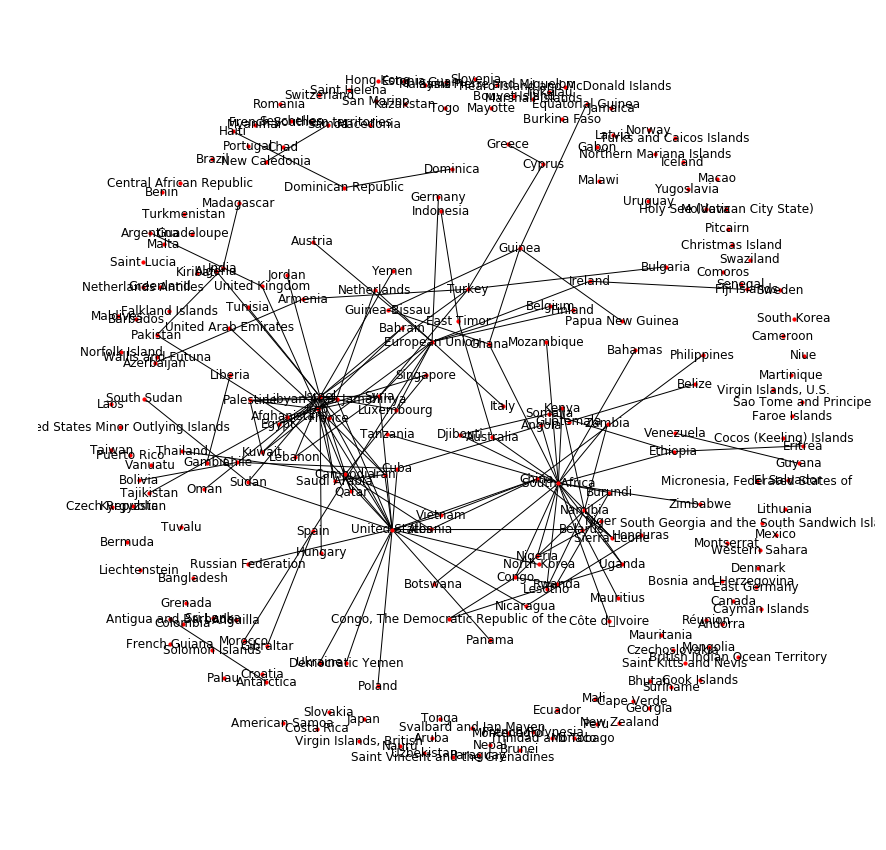

In [192]:
labels = {}
gfig, gax = plt.subplots(figsize=(15,15))
for i in matrix2:
    labels[i] = i
#nx.draw_networkx_labels(g, nx.spring_layout(g,k=0.35), labels, font_size=10) (THIS WAS NOT A GOOD LINE)
nx.draw(g, nx.spring_layout(g,k=0.35), with_labels=True, node_size=10,ax=gax)

In [193]:
'''gfig, gax = plt.subplots(figsize=(15,15))
hego = nx.ego(allg,'United States',radius=2)
pos = nx.spring_layout(hego, k=20*1/math.sqrt(len(mat.index)),scale=8.0)
nx.draw(hego, pos, ax=gax, node_size=1000, with_label=True, font_size=18)'''

"gfig, gax = plt.subplots(figsize=(15,15))\nhego = nx.ego(allg,'United States',radius=2)\npos = nx.spring_layout(hego, k=20*1/math.sqrt(len(mat.index)),scale=8.0)\nnx.draw(hego, pos, ax=gax, node_size=1000, with_label=True, font_size=18)"

In [194]:
'''years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1'''

'years = {}\nfor row in db[1:]:\n    yr = row[1]\n    country = row[2]\n    if country not in unknown_country:\n        region = row[5]\n        if yr not in years:\n            years[yr] = {}\n        if region not in years[yr]:\n            years[yr][region] = 1\n        else:\n            years[yr][region] += 1'

In [195]:
'''for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])'''

'for yr in sorted(years):\n    for region in sorted(years[yr]):\n        print(yr, region, years[yr][region])'